In [1]:
using Revise
using Reparam
using Plots; gr()

┌ Info: Precompiling Reparam [c49b29fa-1d3a-4ad9-af7c-a9d9e2a11c6b]
└ @ Base loading.jl:1278


Plots.GRBackend()

In [135]:
line(t) = [t, 0]
graph_quad(t) = [t, t^2]
graph_exp1(t) = [t, exp(-100(t-0.25)^2)]
graph_exp2(t) = [t, exp(-100(t-0.75)^2)]
circle(t) = [cos(2π*t), sin(2π*t)]
infinity(t) = [cos(2π*t), sin(4π*t)]
spiral(t) = t * circle(t)

# Diffeomorphisms
quad(t) = 0.9t^2 + 0.1t
step(t; a=25) = (1 + exp(-a)) / (1 + exp(-2a*(t-0.5)))
logdiff(t; a=25) = log(a*t + 1) / log(a + 1)
combined(t) = (step(t) + logdiff(t)) / 2

combined (generic function with 1 method)

In [3]:
function same_shape_reparametrization(curve, diffeomorphism; 
        projector=FourierSineProjector(5), kwargs...)
    c2 = curve ∘ diffeomorphism
    r = Q_transform(curve)
    q = Q_transform(c2)
    
    return reparametrize(q, r, projector; kwargs...)
end

same_shape_reparametrization (generic function with 1 method)

In [350]:
function plot_same_shape_reparametrization(curve, diffeomorphism, res)
    c2 = curve ∘ diffeomorphism
    r = Q_transform(curve)
    q = Q_transform(c2)
    
    p1 = plot_curve(q, 0:0.002:1, label="Q(c∘γ) True", color=:black)
    plot_curve!(r, 0:0.002:1, label="Q(c)")
    
    ψ = ∘(res.reparams...)
    
    plot_curve!(Q_reparametrization(r, ψ), 0:0.002:1, label="Q(c∘γ) Found")    
    
    p2 = plot(diffeomorphism, 0, 1, label="Analytic", color=:black)
    plot!(ψ, 0, 1, label="Numeric")
    
    return p1, p2
end
    

plot_same_shape_reparametrization (generic function with 1 method)

In [364]:
res = same_shape_reparametrization(infinity, combined, 
    projector=FourierSineProjector(10),
    lsconfig=BacktrackConfig(c=0.5), 
    α_step=0.9,
    maxiter=100)

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 9.9938764714e+00 |                  |                  |                  |
|    1 | 7.2808465772e+00 | 1.5714866107e-04 | 1.4143379496e-04 | 2.0117336864e-02 | 2.7146922438e-01 |
|    2 | 5.8505179108e+00 | 1.3775374615e-04 | 1.2397837153e-04 | 1.7883035201e-02 | 1.9645087302e-01 |
|    3 | 5.6647755939e+00 | 4.1556468213e-04 | 9.5067869847e-05 | 5.7546644584e-03 | 3.1748012684e-02 |
|    4 | 5.5840838507e+00 | 1.7523508664e-04 | 1.0189874202e-05 | 1.2727860763e-03 | 1.4244473034e-02 |
|    5 | 5.5131161232e+00 | 9.7870908453e-04 | 6.3235195409e-05 | 2.9273406326e-03 | 1.2708929430e-02 |
|    6 | 5.4507931518e+00 | 2.0187849684e-04 | 9.5087370134e-06 | 1.0384074761e-03 | 1.1304490963e-02 |
|    7 | 5.219

Reparam.ReparametrizationSolution{Reparam.var"#3#5"{Base.var"#62#63"{typeof(infinity),typeof(combined)},Reparam.var"#cdt#4"{Base.var"#62#63"{typeof(infinity),typeof(combined)}}},Reparam.var"#3#5"{typeof(infinity),Reparam.var"#cdt#4"{typeof(infinity)}},Reparam.OrthogonalProjector{Reparam.FourierSineBasisFunction,typeof(Reparam.l2_inner_product)}}(Reparam.var"#3#5"{Base.var"#62#63"{typeof(infinity),typeof(combined)},Reparam.var"#cdt#4"{Base.var"#62#63"{typeof(infinity),typeof(combined)}}}(Base.var"#62#63"{typeof(infinity),typeof(combined)}(infinity, combined), Reparam.var"#cdt#4"{Base.var"#62#63"{typeof(infinity),typeof(combined)}}(Base.var"#62#63"{typeof(infinity),typeof(combined)}(infinity, combined))), Reparam.var"#3#5"{typeof(infinity),Reparam.var"#cdt#4"{typeof(infinity)}}(infinity, Reparam.var"#cdt#4"{typeof(infinity)}(infinity)), Reparam.OrthogonalProjector{Reparam.FourierSineBasisFunction,typeof(Reparam.l2_inner_product)}(Reparam.FourierSineBasisFunction[Reparam.FourierSineBasisF

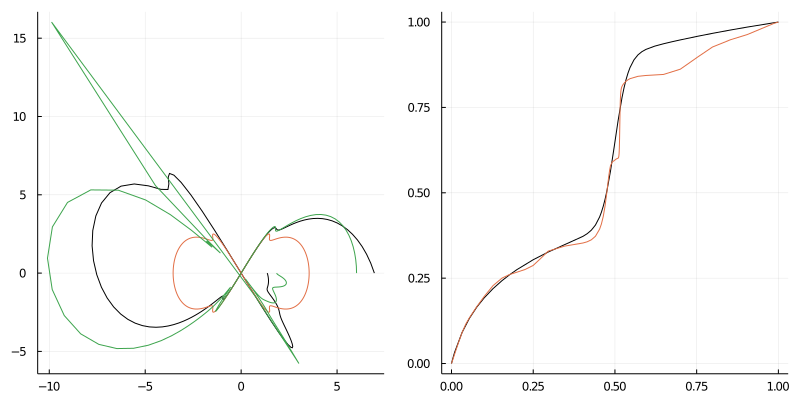

In [367]:
p1, p2 = plot_same_shape_reparametrization(infinity, combined, res)
plot(p1, p2, legend=false, size=(800, 400))

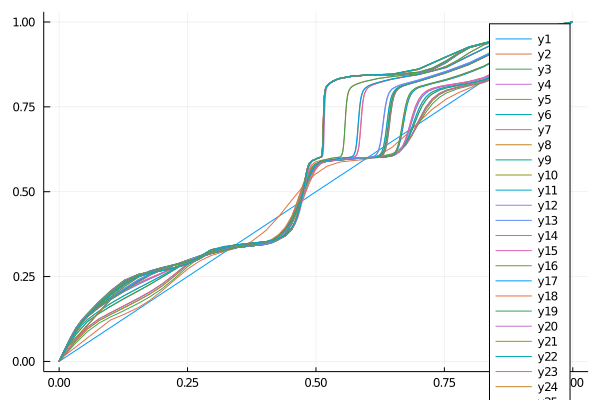

In [382]:
Γ = accumulate_composition(res.reparams)
plot(Γ, 0, 1)

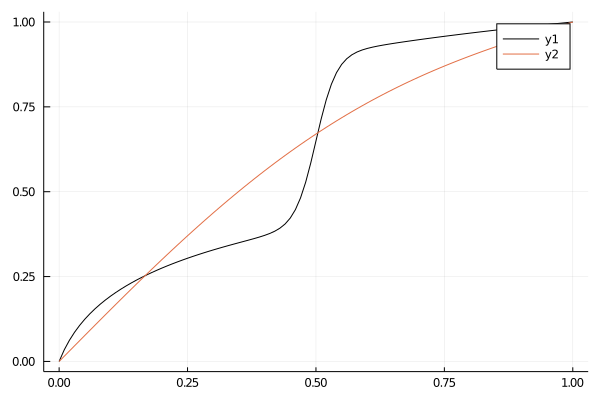

In [355]:
Tfine = 0:0.01:1
ψ = Reparam.project(x -> combined(x) - x, FourierSineProjector(1))
plot(combined, 0:0.01:1, color=:black)
plot!(Tfine, (x -> ψ(x) + x).(Tfine))

In [318]:
function plot_stepsize(c1, c2, projector)
    q = Q_transform(c1)
    r = Q_transform(c2)
    
    ∇E = l2_gradient(q, r)
    dγ = Reparam.project(∇E, projector)
    εmax = Reparam.max_step_length(dγ, alpha=0.9999)
    
    f(ε) = l2_distance(q, Q_reparametrization(r, x -> x - ε * dγ(x)))
    
    plot(f, range(0, εmax, length=101))
end
    
    

plot_stepsize (generic function with 1 method)

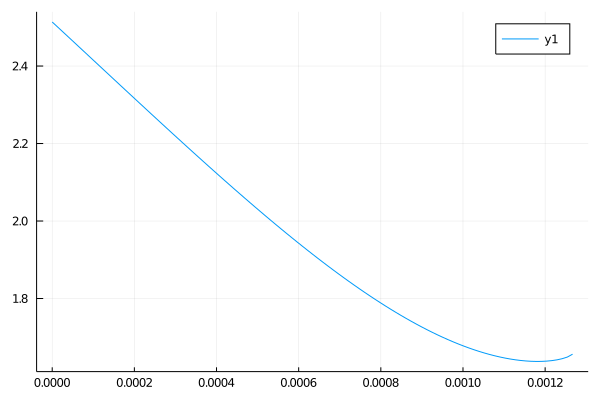

In [345]:
plot_stepsize(circle, circle∘quad, FourierSineProjector(5))

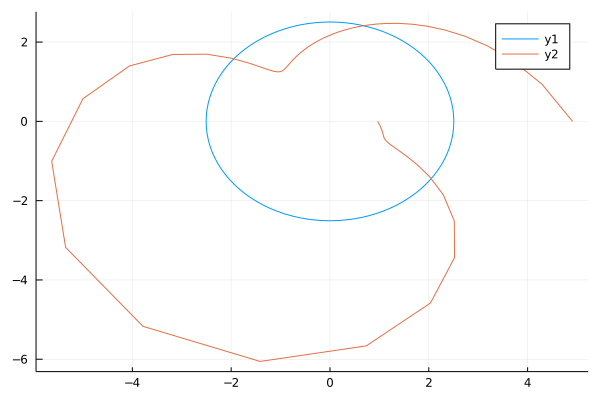

In [376]:
q = Q_transform(circle)
r = Q_transform(circle∘combined)

plot_curve(q)
plot_curve!(r)

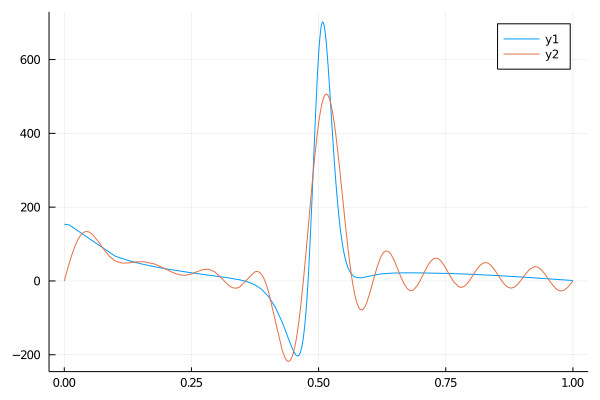

In [381]:
∇E = l2_gradient(q, r)
dγ = Reparam.project(∇E, FourierSineProjector(2))
∇E_proj(x) = dγ(x)

plot(∇E, 0, 1)
plot!(∇E_proj, 0, 1)